In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline
pd.options.display.max_rows = 18

In [2]:
women_majors = pd.read_csv('bachelors-women.csv')

In [ ]:
women_majors.shape
# women_majors.isnull().any()
women_majors.info()
women_majors['Year'].max(), women_majors['Year'].min()
women_majors.head()

In [3]:
wm1970 = women_majors.loc[0, women_majors.loc[0] < 20]
wm1970

Agriculture           4.229798
Architecture         11.921005
Business              9.064439
Computer Science     13.600000
Engineering           0.800000
Physical Sciences    13.800000
Name: 0, dtype: float64

In [ ]:
axes = women_majors.plot(x = 'Year', y = wm1970.index, figsize = (12,8), 
                  #ylabel = 'Percentage degrees',
                  title = 'Percentage of Bachelor degrees conferred to women(1970-2011)')
axes.set_ylabel('Percentage degrees')

In [4]:
style.available
%config InlineBackend.figure_format = 'retina'
default_style = dict(mpl.rcParams)

In [5]:
# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]
def plot_it():    
    axes = women_majors.plot(x = 'Year', 
                             y = wm1970.index, 
                             figsize = (14,10),
                             color = colors,
                             legend = False)
    # axes.set_ylabel('Percentage degrees')
    return axes

In [ ]:
# ----- Testing styles ------
style.use('dark_background')
plot_it()
mpl.rcParams.update(default_style)

In [ ]:
style.use('Solarize_Light2')
plot_it()
mpl.rcParams.update(default_style)

In [ ]:
style.use('seaborn-darkgrid')
plot_it()
mpl.rcParams.update(default_style)

In [ ]:
style.use('seaborn-poster')
plot_it()
mpl.rcParams.update(default_style)

In [ ]:
style.use('ggplot')
plot_it()
mpl.rcParams.update(default_style)

In [ ]:
style.use('fivethirtyeight')
plot_it()
# mpl.rcParams.update(default_style)
# style.use('default')
# ----- End of testing styles ------

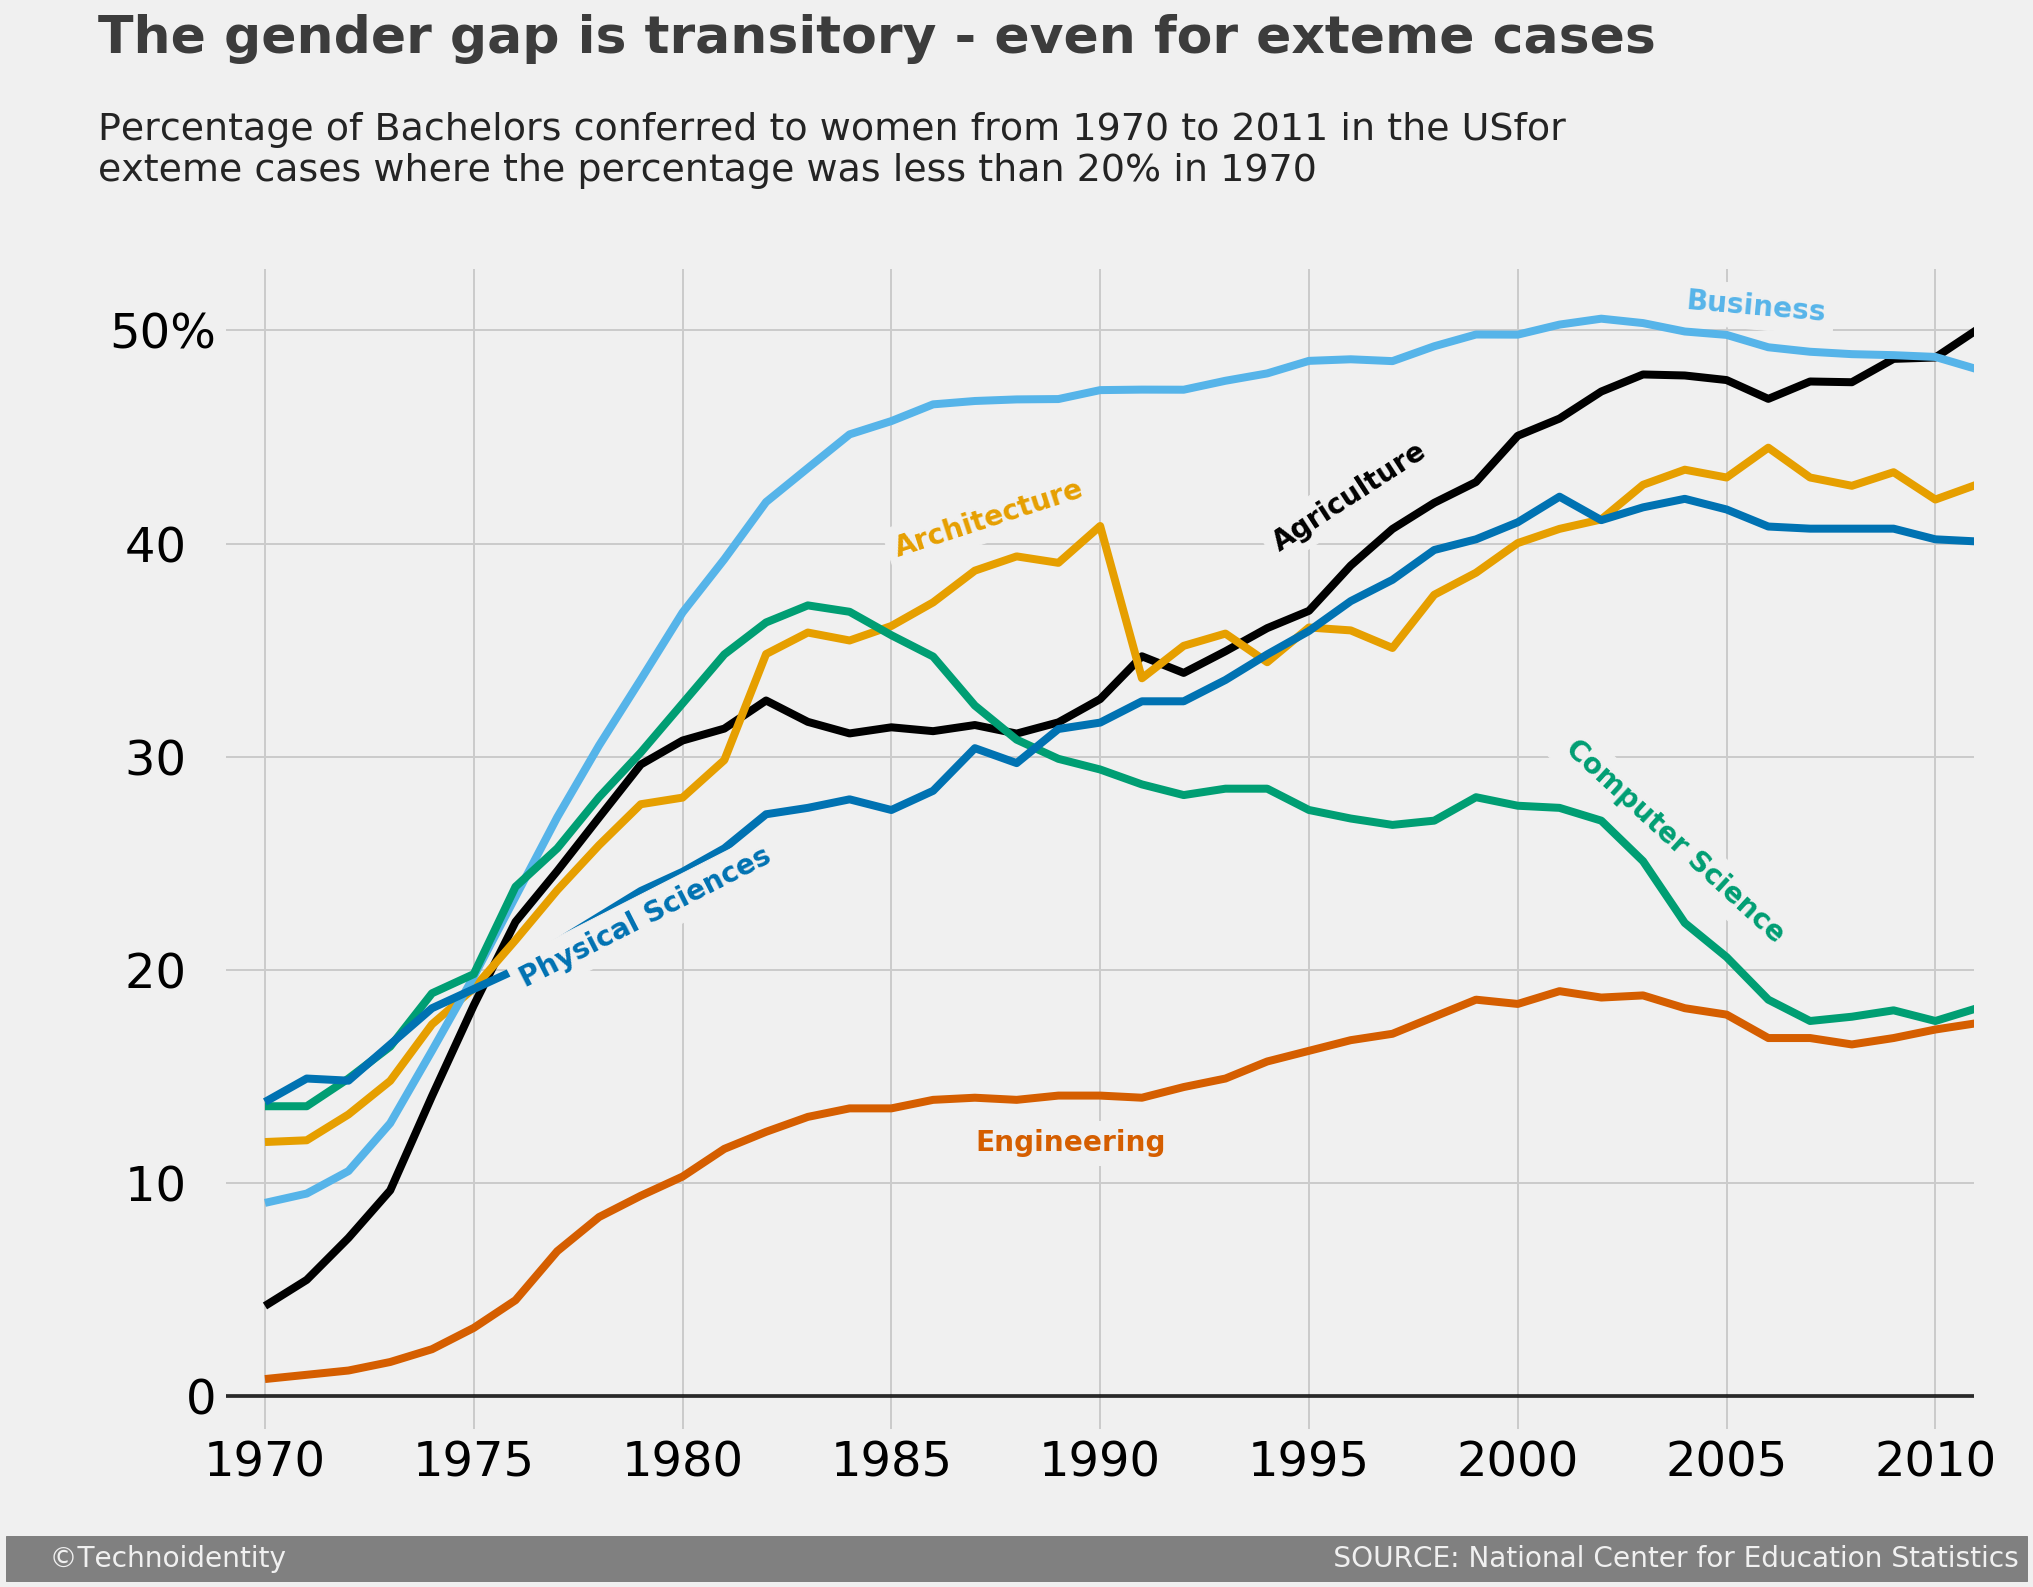

In [6]:
style.use('fivethirtyeight')
main = plot_it()
main.tick_params(axis = 'both', which = 'major', labelsize = 24)
a = main.set_yticklabels(labels = ['-10  ', '0', '10  ', '20  ', '30  ', '40  ', '50%', '60  '])
main.axhline(y = 0, color = 'black', linewidth = 1.9, alpha = 0.8)
# main.axvline(x = 1971, color = 'black', linewidth = 1.5, alpha=0.8)
main.set_xlim(left = 1969, right = 2011)

# Always add/customize text on the graph in the final step
# Signature bar
sig = ('    \u00A9Technoidentity                                                     '
                   '                                                                 '
                   'SOURCE: National Center for Education Statistics')
main.xaxis.label.set_visible(False)
# Type 1
main.text(x = 1964, y = -8, s = sig, size=14, color='#f0f0f0', backgroundcolor='grey')
# Type 2
# main.text(x = 1964, 
#           y = -6.5, 
#           s = ('---------------------------------------------------------------------------------------'
#                '-----------------------------------------------------------------------------------------'
#                '-------------------------------'),
#           color = 'grey', alpha = .7)

# main.text(x = 1964, y = -8, s = sig, fontsize = 14, color = 'grey', alpha = .7)

# title and subtitle
main.text(x = 1966, y = 63, s = 'The gender gap is transitory - even for exteme cases',
          fontsize = 26, weight = 'bold', alpha = 0.75)
main.text(x = 1966, 
              y = 57, 
              s = ('Percentage of Bachelors conferred to women from 1970 to 2011 in the US'
                   'for \nexteme cases where the percentage was less than 20% in 1970'),
          fontsize = 19, alpha = 0.85)

# legend style
main.text(x = 1994, y = 44, s = 'Agriculture', color = colors[0], weight = 'bold', rotation = 33,
              backgroundcolor = '#f0f0f0')
main.text(x = 1985, y = 42.2, s = 'Architecture', color = colors[1], weight = 'bold', rotation = 18,
              backgroundcolor = '#f0f0f0')
main.text(x = 2004, y = 51, s = 'Business', color = colors[2], weight = 'bold', rotation = -5, 
               backgroundcolor = '#f0f0f0')
main.text(x = 2001, y = 30, s = 'Computer Science', color = colors[3], weight = 'bold', rotation = -42.5,
              backgroundcolor = '#f0f0f0')
main.text(x = 1987, y = 11.5, s = 'Engineering', color = colors[4], weight = 'bold',
              backgroundcolor = '#f0f0f0')
x = main.text(x = 1976, y = 25, s = 'Physical Sciences', color = colors[5], weight = 'bold', rotation = 27,
              backgroundcolor = '#f0f0f0')

In [8]:
fig = main.get_figure()
fig.savefig('538style.svg', dpi=fig.dpi)